In [162]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [163]:
# 读取数据
df_original = pd.DataFrame(pd.read_excel('personalroadriskassessv2.xlsx'))
df_original.head(5)

df_test_original = pd.DataFrame(pd.read_excel('personalroadriskassessv2test.xlsx'))
df_test_original.head(5)

,id,ZJCX,LJJF,xb,jl,HPZL,WFJFS,WFSJ,hnum,age,child,marrige,whcd,cllx,cpid,SFSG
0,108945,5.0,9,1,0,NaN,NaN,NaN,0,50,0.0,0.0,NaN,NaN,NaN,0
1,108946,5.0,0,2,0,NaN,NaN,NaN,0,26,0.0,0.0,NaN,NaN,NaN,0
2,108947,5.0,0,1,0,NaN,NaN,NaN,0,25,0.0,0.0,NaN,NaN,NaN,0
3,108948,5.0,0,1,0,NaN,NaN,NaN,0,33,0.0,0.0,NaN,NaN,NaN,0
4,108949,5.0,0,1,0,NaN,NaN,NaN,0,22,0.0,0.0,NaN,NaN,NaN,0


In [164]:
# 数据处理
# 驾龄空值用平均值取代
df_original['jl'] = df_original['jl'].fillna(df_original['jl'].mean())
df_original['xb'] = df_original['xb'].fillna(method='ffill')
df_original['WFJFS'] = df_original['WFJFS'].fillna(0)

df_test_original['jl'] = df_test_original['jl'].fillna(df_test_original['jl'].mean())
df_test_original['xb'] = df_test_original['xb'].fillna(method='ffill')
df_test_original['WFJFS'] = df_test_original['WFJFS'].fillna(0)

# 移除列
df = df_original.drop(['WFSJ'],1)
df_test = df_test_original.drop(['WFSJ'],1)

In [165]:
# 打印 df 信息
print(df.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46203 entries, 0 to 46202
Data columns (total 15 columns):
id         46203 non-null int64
ZJCX       46203 non-null float64
LJJF       46203 non-null int64
xb         46203 non-null float64
jl         46203 non-null float64
HPZL       1250 non-null float64
WFJFS      46203 non-null float64
age        46203 non-null int64
marrige    46203 non-null int64
WHCD       2452 non-null float64
cllx       22039 non-null float64
cpid       22051 non-null float64
child      46203 non-null int64
hnum       46203 non-null int64
SFSG       46203 non-null int64
dtypes: float64(8), int64(7)
memory usage: 5.3 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 15 columns):
id         1535 non-null int64
ZJCX       1535 non-null float64
LJJF       1535 non-null int64
xb         1535 non-null int64
jl         1535 non-null int64
HPZL       16 non-null float64
WFJFS      1535 non-null float64
hnum       153

In [166]:
# df.head(5)

In [167]:
part_df = df[[
    'ZJCX', 'LJJF', 'xb', 'jl',  'marrige', 'child', 'hnum',
    'age' ,'WFJFS', 'SFSG'
]]

part_df_test = df_test[[
    'ZJCX', 'LJJF', 'xb', 'jl',  'marrige', 'child', 'hnum',
    'age' ,'WFJFS', 'SFSG'
]]



# label_df = df[['SFSG']]
# print('type(part_df)',type(part_df))
# print('type(df)',type(df)) 
# df.head(2)

# print('type(part_df)',type(part_df))
# print('part_df.shape',part_df.shape)

In [168]:
# 特征处理
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# from sklearn_pandas import DataFrameMapper


part_df.head(5)
skb_x = part_df.drop(['SFSG'],1)
skb_y = part_df['SFSG']
                      
    
    
X_new = SelectKBest(chi2, k=3).fit(skb_x, skb_y)
print(X_new.get_support(indices=False))
print(X_new.get_support(indices=True))
print(type(X_new.get_support(indices=True)))
print(X_new.fit_transform(skb_x, skb_y))

# .fit(skb_x, skb_y)
# aaa = X_new
# X_new.get_feature_names()

# X_new1 = SelectKBest(chi2, k=5).get_params(deep=True)

# print(X_new)
# print(X_new1)

# vectorizer = TfidfVectorizer(sublinear_tf=True, 
#                              smooth_idf = True,
#                              max_df=0.5,
#                              stop_words='english')
# feature_names = vectorizer.get_feature_names()
# ch2 = SelectKBest(chi2, k=opts.select_chi2)
# X_train = ch2.fit_transform(X_train, y_train)
# X_test = ch2.transform(X_test)
# selected_feature_names = [feature_names[i] for i in ch2.get_support(indices=True)]

[False False False  True False  True False  True False]
[3 5 7]
<class 'numpy.ndarray'>
[[ 8.  0. 49.]
 [ 2.  1. 46.]
 [ 2.  1. 46.]
 ...
 [ 0.  0. 27.]
 [ 0.  0. 24.]
 [ 0.  0. 24.]]


In [169]:
#用 sklearn  分割训练集和测试集
train_df, verify_df = train_test_split(part_df, test_size = 0.3)
# print('type(part_df)',type(part_df))
# print('type(train_df)',type(train_df)) 
# print('type(verify_df)',type(verify_df)) 

In [182]:
# 读取需要的数据转换成 np
#    'CLLX', 'marrige', 'hnum',
# 选择参数列
X_select_elements = ['LJJF','ZJCX', 'age', 'xb', 'jl', 'child', 'marrige','WFJFS', 'hnum']
Y_select_elements = 'SFSG'

   
# 训练数据
train_X = np.array(train_df[X_select_elements])
train_Y = np.array(train_df[Y_select_elements])

# 验证数据
verify_X = np.array(verify_df[X_select_elements])
verify_Y = np.array(verify_df[Y_select_elements])

# 测试数据
test_X = np.array(part_df_test[X_select_elements])

print('train_X.shape',train_X.shape)
print('verify_X.shape',verify_X.shape)
print('test_X.shape',test_X.shape)

train_X.shape (32342, 9)
verify_X.shape (13861, 9)
test_X.shape (1535, 9)


In [183]:
print("验证数据 1的数量=",np.sum(verify_Y == 1 ))
print("验证数据 0的数量=",np.sum(verify_Y == 0 ))

验证数据 1的数量= 10727
验证数据 0的数量= 3134


In [184]:
# 均值化
from sklearn.preprocessing import MinMaxScaler

minMax = MinMaxScaler()
train_X = minMax.fit_transform(train_X)
verify_X = minMax.fit_transform(verify_X)
test_X = minMax.fit_transform(test_X)


In [173]:
# train_X_tansor = tf.convert_to_tensor(train_X)
# train_Y_tansor = tf.convert_to_tensor(train_Y)
# verify_X_tansor = tf.convert_to_tensor(verify_X)
# verify_Y_tansor = tf.convert_to_tensor(verify_Y)

In [174]:
# with tf.Session() as sess:
#     sess.run(train_X_tansor)
#     sess.run(train_Y_tansor)
#     sess.run(verify_X_tansor)
#     sess.run(verify_Y_tansor)
#     print(train_X_tansor)
#     print(train_Y_tansor)
#     print(verify_X_tansor)
#     print(verify_Y_tansor)

In [185]:
# 独热编码
train_Y_oh = (np.arange(2) == train_Y[:,None]).astype(np.float32)
verify_Y_oh = (np.arange(2) == verify_Y[:,None]).astype(np.float32)
print(train_Y_oh)

# 二值化
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
train_Y_lb = lb.fit_transform(train_Y)
verify_Y_lb = lb.fit_transform(verify_Y)

print(train_Y_lb)
print(train_Y_lb.shape)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[[1]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]
(32342, 1)


In [186]:
# 公用 shape 参数
xs1 = train_X.shape[1]
ys1 = train_Y_oh.shape[1]

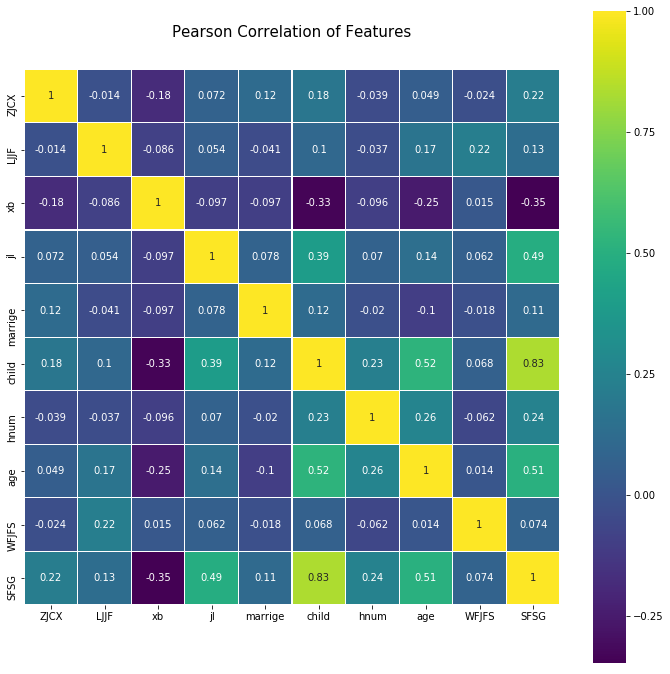

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

#  'ZJCX', 'LJJF', 'xb', 'jl', 'CLLX', 'marrige', 'child', 'hnum',
#     'age', 'XZQH','SSRS','SWRS7','sghpzl'

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(part_df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, xticklabels=True, yticklabels=True)
plt.show()

In [178]:
# 二分类评价函数
def tf_confusion_metrics(predict, real, session, feed_dict):
    predictions = tf.argmax(predict, 1)
    actuals = tf.argmax(real, 1)

    ones_like_actuals = tf.ones_like(actuals)
    zeros_like_actuals = tf.zeros_like(actuals)
    ones_like_predictions = tf.ones_like(predictions)
    zeros_like_predictions = tf.zeros_like(predictions)

    tp_op = tf.reduce_sum(
        tf.cast(
            tf.logical_and(
                tf.equal(actuals, ones_like_actuals),
                tf.equal(predictions, ones_like_predictions)), "float"))

    tn_op = tf.reduce_sum(
        tf.cast(
            tf.logical_and(
                tf.equal(actuals, zeros_like_actuals),
                tf.equal(predictions, zeros_like_predictions)), "float"))

    fp_op = tf.reduce_sum(
        tf.cast(
            tf.logical_and(
                tf.equal(actuals, zeros_like_actuals),
                tf.equal(predictions, ones_like_predictions)), "float"))

    fn_op = tf.reduce_sum(
        tf.cast(
            tf.logical_and(
                tf.equal(actuals, ones_like_actuals),
                tf.equal(predictions, zeros_like_predictions)), "float"))
    tp, tn, fp, fn = session.run([tp_op, tn_op, fp_op, fn_op], feed_dict)

    tpr = float(tp) / (float(tp) + float(fn))
    fpr = float(fp) / (float(fp) + float(tn))
    fnr = float(fn) / (float(tp) + float(fn))
    # tp+fn = 所有真
    # fp+tn = 所有假
    # fpr = 实际是假，但预测成真占所有假的比例是多少
    # fnr = 实际是真，但预测成假占所有真的比例是多少
    
    print('tpr=Recall 虚警率',tpr)
    print('fnr 漏警率',tpr)
    

    accuracy = (float(tp) + float(tn)) / (
        float(tp) + float(fp) + float(fn) + float(tn))

    recall = tpr
    precision = float(tp) / (float(tp) + float(fp))

    f1_score = (2 * (precision * recall)) / (precision + recall)
    # t,f()  true，false
    # p(),n() 是预测的真假
    # t 表示 程序成功
    # f 表示 程序错误
    # p 表示 预测真
    # n 表示 预测假
    print('tp(程序成功预测成真) = ', tp, ', tn(程序成功预测成假) = ', tn, ', fp(程序错误预测真) = ',
          fp, ', fn(程序错误预测成假) = ', fn)
    print('tpr = ', tpr, ', fpr = ', fpr, ', fnr = ', fnr)
    print('F1 Score = ', f1_score, ', Precision = ', precision, ', Recall = ',
          recall, ', Accuracy = ', accuracy)

In [291]:
# 定义超参数和placeholder
learning_rate = 0.5
epochs = 10
batch_size = 100

# placeholder
x = tf.placeholder(tf.float32, [None, xs1])
# 输出为0-1的one-hot编码
y = tf.placeholder(tf.float32, [None, ys1])

In [292]:
# 定义参数w和b
# hidden layer => w, b
W1 = tf.Variable(tf.random_normal([xs1, xs1], stddev=0.03), name='W1')
b1 = tf.Variable(tf.random_normal([xs1]), name='b1')
# output layer => w, b
W2 = tf.Variable(tf.random_normal([xs1, ys1], stddev=0.03), name='W2')
b2 = tf.Variable(tf.random_normal([ys1]), name='b2')

# 构造隐层网络
hidden_out = tf.add(tf.matmul(x, W1), b1)
hidden_out = tf.nn.relu(hidden_out)

# 构造输出（预测值）
# 计算输出
y_ = tf.nn.softmax(tf.add(tf.matmul(hidden_out, W2), b2))

# BP部分—定义loss 
# 对n个标签计算交叉熵
# 对m个样本取平均
y_clipped = tf.clip_by_value(y_, 1e-10, 0.9999999)
cross_entropy = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_clipped) + (1 - y) * tf.log(1 - y_clipped), axis=1))

# BP部分—定义优化算法
# 创建优化器，确定优化目标
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

# 定义初始化operation和准确率node
# init operator
init_op = tf.global_variables_initializer()

# 创建准确率节点
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [293]:
# 开始训练
# 创建session
with tf.Session() as sess:
    # 变量初始化
    sess.run(init_op)
    total_batch = int(len(train_Y) / batch_size)
    print(total_batch)
    for epoch in range(epochs):
        avg_cost = 0
        for i in range(total_batch):
#             batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size)
            _, c = sess.run([optimizer, cross_entropy], feed_dict={x: train_X, y: train_Y_oh})
            avg_cost += c / total_batch
        print("Epoch:", (epoch + 1), "cost = ", "{:.3f}".format(avg_cost))
    print(sess.run(accuracy, feed_dict={x: verify_X, y: verify_Y_oh}))

67
Epoch: 1 cost =  0.963
Epoch: 2 cost =  0.791
Epoch: 3 cost =  0.779
Epoch: 4 cost =  0.765
Epoch: 5 cost =  0.762
Epoch: 6 cost =  0.759
Epoch: 7 cost =  0.750
Epoch: 8 cost =  0.749
Epoch: 9 cost =  0.744
Epoch: 10 cost =  0.745
0.82363135


In [187]:
# 程序3

print('xs1',xs1)
print('ys1',ys1)
tf.reset_default_graph()

x = tf.placeholder(tf.float32,shape = [None,xs1],name = 'input')
y = tf.placeholder(tf.float32,shape = [None,ys1],name = 'label')
weights1 = tf.Variable(tf.random_normal([xs1,xs1]),name = 'weights1')
bias1 = tf.Variable(tf.zeros([xs1]),name = 'bias1')
a = tf.nn.relu(tf.matmul(x,weights1) + bias1)
tf.summary.histogram("relu1", a)
weights2 = tf.Variable(tf.random_normal([xs1,ys1]),name = 'weights2')
bias2 = tf.Variable(tf.zeros([ys1]),name = 'bias2')
z = tf.matmul(a,weights2) + bias2
tf.summary.histogram("relu2", z)

y_pred = tf.nn.softmax(z)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=z))
# cost = tf.log(tf.clip_by_value(tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=z)),1e-8,1.0))

correct_pred = tf.equal(tf.argmax(y,1),tf.argmax(y_pred,1))
acc_op = tf.reduce_mean(tf.cast(correct_pred,tf.float32))
train_op = tf.train.AdamOptimizer(0.001).minimize(cost)
# loss = tf.log(tf.clip_by_value(y,1e-8,1.0))
# loss = tf.log(tf.clip_by_value(tf.sigmoid(self.scores),1e-8,1.0)

# 图相关
# Create a summary to monitor cost tensor
tf.summary.scalar("loss", cost)
# Create a summary to monitor accuracy tensor
tf.summary.scalar("accuracy", acc_op)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()


xs1 9
ys1 2


In [188]:
import os
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics

# 存档入口
saver = tf.train.Saver()

# 在Saver声明之后定义的变量将不会被存储
# non_storable_variable = tf.Variable(777)

ckpt_dir = './ckpt_dir'
logs_path = './tensorflow_logs/example/'
# print('train_X.shape',train_X.shape)
if not os.path.exists(ckpt_dir):
    os.makedirs(ckpt_dir)

with tf.Session() as sess:
    tf.global_variables_initializer().run()

    # 操作写入到  Tensorboard
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
    
    ckpt = tf.train.latest_checkpoint(ckpt_dir)
    if ckpt:
        print('Restoring from checkpoint: %s' % ckpt)
        saver.restore(sess, ckpt)

    for epoch in range(30):
        total_loss = 0.
        for i in range(len(train_X)):
            feed_dict = {x: [train_X[i]],y:[train_Y_oh[i]]}
            _,loss,summary = sess.run([train_op,cost,merged_summary_op],feed_dict=feed_dict)
            total_loss +=loss
            summary_writer.add_summary(summary, epoch * len(train_X) + i)
        print('Epoch: %4d, total loss = %.12f' % (epoch,total_loss))
        if epoch % 10 == 0:
            accuracy = sess.run(acc_op,feed_dict={x:verify_X,y:verify_Y_oh})
            print("Accuracy on validation set: %.9f" % accuracy)
            
            
            
    saver.save(sess, ckpt_dir + '/logistic.ckpt')
    print('training complete!')
#     print('acc_op',acc_op)
    accuracy = sess.run(acc_op,feed_dict={x:verify_X,y:verify_Y_oh})
    pred = sess.run(y_pred,feed_dict={x:verify_X})

#     沿轴拿最大值的索引
    correct = np.equal(np.argmax(pred,1),np.argmax(verify_Y_oh,1))
#     print('np.argmax(pred,1)',np.argmax(pred,1))
#     print('np.argmax(pred,0)',np.argmax(pred,0))

    predictions = np.argmax(pred, 1)
    print('predictions',predictions)
    
    numpy_accuracy = np.mean(correct.astype(np.float32))
    
#     y_true = np.argmax(verify_Y_oh,1)
#     print('y_true', y_true)
#     print('pred', pred)
#     print('correct', correct)
#     print('correct.astype(np.float32)', correct.astype(np.float32))
    
    # 输出指标
    
    print("Accuracy on validation set: %.9f" % accuracy)
    print("Accuracy on validation set (numpy): %.9f" % numpy_accuracy)
    
    print("Precision", metrics.precision_score(verify_Y  , predictions))
    print( "Recall", metrics.recall_score(verify_Y , predictions))
    print( "f1_score", metrics.f1_score(verify_Y , predictions))
    print( "confusion_matrix")
    print( metrics.confusion_matrix(verify_Y , predictions))
    fpr, tpr, tresholds = metrics.roc_curve(verify_Y , predictions)

#     predictLabel = tf.constant(pred)
#     print('predictLabel',predictLabel)
#     predictLabel =  predictLabel.eval()   
    
    
#     print('predictLabel.shape',predictLabel.shape)
    print('verify_Y_oh.shape',verify_Y_oh.shape)
    print('y_pred.shape',y_pred.shape)
    print('y_true.shape',y_true.shape)
    print('correct_num.shape',correct_num.shape)
    metrics = tf_confusion_metrics(y_pred, verify_Y_oh, sess, feed_dict={x:verify_X,y:verify_Y_oh})
    
#     print('metrics.accuracy',metrics.accuracy)
    
    saver.save(sess, ckpt_dir + '/logistic.ckpt')
    
#     plt.plot(train_X, train_Y, 'ro', label='Original data')
#     plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
#     plt.legend()
#     plt.show()
    
#     '''
#     测试数据的清洗和训练数据一样，两者可以共同完成
#     '''
    
# #     评估模型  
#     possibility = sess.run(y_pred, feed_dict={x: test_X})
    
#     possibility_array = np.array(possibility,dtype=float)
    
# #     print('possibility',possibility)
# #     print('possibility.shape',possibility.shape)
# #     print('possibility.shape',type(possibility.shape))
    
#     predictions = np.argmax(possibility, 1)
    
# #     print('possibility[0]',possibility[:,0])
# #     print('possibility[0]',(possibility[:,0].shape))

#     #保存结果  
#     submission = pd.DataFrame({  
#         "id": df_test_original["id"],  
#         "SFSG": predictions,
#         "possibility_0": possibility[:,0],
#         "possibility_1": possibility[:,1]
#     })  
#     submission.to_csv("SG-submission.csv", index=False)  

Epoch:    0, total loss = 2838.897596028603
Accuracy on validation set: 0.974532843
Epoch:    1, total loss = 2349.113478989097
Epoch:    2, total loss = 2251.452762933866
Epoch:    3, total loss = 2187.638938520300
Epoch:    4, total loss = 2139.261941793594
Epoch:    5, total loss = 2109.329274770981
Epoch:    6, total loss = 2085.977743985734
Epoch:    7, total loss = 2071.528086901066
Epoch:    8, total loss = 2062.314761384866
Epoch:    9, total loss = 2057.328496801078
Epoch:   10, total loss = 2050.946673917462
Accuracy on validation set: 0.979366541
Epoch:   11, total loss = 2044.245285957274
Epoch:   12, total loss = 2035.229752751784
Epoch:   13, total loss = 2027.284611574848
Epoch:   14, total loss = 2020.091866801041
Epoch:   15, total loss = 2016.839192419254
Epoch:   16, total loss = 2013.116269801847
Epoch:   17, total loss = 2009.105429747304
Epoch:   18, total loss = 2006.300921449260
Epoch:   19, total loss = 2005.928288250342
Epoch:   20, total loss = 1998.257935367

In [190]:
# 恢复测试1
ckpt_dir = './ckpt_dir'

saver = tf.train.Saver()
print(test_X)
print(test_X.shape)
with tf.Session() as sess:
    ckpt = tf.train.latest_checkpoint(ckpt_dir)
    if ckpt:
        print('Restoring from checkpoint: %s' % ckpt)
        saver.restore(sess, ckpt)
    
#     评估模型  
    possibility = sess.run(y_pred, feed_dict={x: test_X})
    
    possibility_array = np.array(possibility,dtype=float)
    
#     print('possibility',possibility)
#     print('possibility.shape',possibility.shape)
#     print('possibility.shape',type(possibility.shape))
    
    predictions = np.argmax(possibility, 1)
    
#     print('possibility[0]',possibility[:,0])
#     print('possibility[0]',(possibility[:,0].shape))

    #保存结果  
    submission = pd.DataFrame({  
        "id": df_test_original["id"],  
        "SFSG": predictions,
        "possibility_0": possibility[:,0],
        "possibility_1": possibility[:,1]
    })  
    submission.to_csv("SG-submission.csv", index=False)  
    
    

[[0.45       0.11111111 0.81967213 ... 0.         0.         0.        ]
 [0.         0.11111111 0.42622951 ... 0.         0.         0.        ]
 [0.         0.11111111 0.40983607 ... 0.         0.         0.        ]
 ...
 [0.3        0.11111111 0.         ...        nan 0.         0.73972603]
 [0.3        0.11111111 0.         ...        nan 0.         0.73972603]
 [0.3        0.11111111 0.         ...        nan 0.         0.73972603]]
(1535, 9)
Restoring from checkpoint: ./ckpt_dir/logistic.ckpt
INFO:tensorflow:Restoring parameters from ./ckpt_dir/logistic.ckpt


In [17]:
# 程序4
from collections import namedtuple

def build_neural_network(hidden_units=10):
    tf.reset_default_graph()
    inputs = tf.placeholder(tf.float32, shape=[None, train_X.shape[1]])
    labels = tf.placeholder(tf.float32, shape=[None, 1])
    learning_rate = tf.placeholder(tf.float32)
    is_training=tf.Variable(True,dtype=tf.bool)
    
    initializer = tf.contrib.layers.xavier_initializer()
    fc = tf.layers.dense(inputs, hidden_units, activation=None,kernel_initializer=initializer)
    fc=tf.layers.batch_normalization(fc, training=is_training)
    fc=tf.nn.relu(fc)
    
    logits = tf.layers.dense(fc, 1, activation=None)
    cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits)
    cost = tf.reduce_mean(cross_entropy)
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    predicted = tf.nn.sigmoid(logits)
    correct_pred = tf.equal(tf.round(predicted), labels)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    # Export the nodes 
    export_nodes = ['inputs', 'labels', 'learning_rate','is_training', 'logits',
                    'cost', 'optimizer', 'predicted', 'accuracy']
    Graph = namedtuple('Graph', export_nodes)
    local_dict = locals()
    graph = Graph(*[local_dict[each] for each in export_nodes])

    return graph

model = build_neural_network()

In [18]:
def get_batch(data_x,data_y,batch_size=32):
    batch_n=len(data_x)//batch_size
    for i in range(batch_n):
        batch_x=data_x[i*batch_size:(i+1)*batch_size]
        batch_y=data_y[i*batch_size:(i+1)*batch_size]
        
        yield batch_x,batch_y

In [22]:
epochs = 30
train_collect = 50
train_print=train_collect*2

learning_rate_value = 0.001
batch_size=16

x_collect = []
train_loss_collect = []
train_acc_collect = []
valid_loss_collect = []
valid_acc_collect = []

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    iteration=0
    for e in range(epochs):
        for batch_x,batch_y in get_batch(train_X,train_Y,batch_size):
            iteration+=1
            feed = {model.inputs: train_X,
                    model.labels: train_Y_lb,
                    model.learning_rate: learning_rate_value,
                    model.is_training:True
                   }

            train_loss, _, train_acc = sess.run([model.cost, model.optimizer, model.accuracy], feed_dict=feed)
            
            if iteration % train_collect == 0:
                x_collect.append(e)
                train_loss_collect.append(train_loss)
                train_acc_collect.append(train_acc)

                if iteration % train_print==0:
                     print("Epoch: {}/{}".format(e + 1, epochs),
                      "Train Loss: {:.4f}".format(train_loss),
                      "Train Acc: {:.4f}".format(train_acc))
                        
                feed = {model.inputs: verify_X,
                        model.labels: verify_Y_lb,
                        model.is_training:False
                       }
                val_loss, val_acc = sess.run([model.cost, model.accuracy], feed_dict=feed)
                valid_loss_collect.append(val_loss)
                valid_acc_collect.append(val_acc)
                
                if iteration % train_print==0:
                    print("Epoch: {}/{}".format(e + 1, epochs),
                      "Validation Loss: {:.4f}".format(val_loss),
                      "Validation Acc: {:.4f}".format(val_acc))
                

    saver.save(sess, "./checkpoint/titanic.ckpt")

NameError: name 'get_batch' is not defined

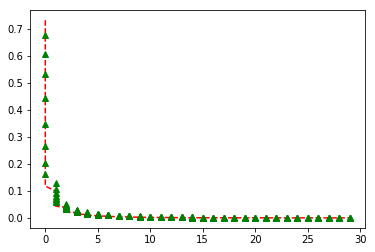

In [412]:
plt.plot(x_collect, train_loss_collect, "r--")
plt.plot(x_collect, valid_loss_collect, "g^")
plt.show()

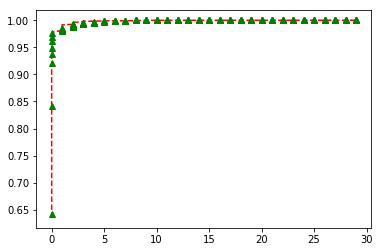

In [413]:
plt.plot(x_collect, train_acc_collect, "r--")
plt.plot(x_collect, valid_acc_collect, "g^")
plt.show()

In [ ]:
# 恢复结果并用测试集训练

# model = build_neural_network()
# restorer = tf.train.Saver()
# with tf.Session() as sess:
#     restorer.restore(sess, "./checkpoint/titanic.ckpt")
#     feed = {
#         model.inputs: test_data,
#         model.is_training: False
#     }
#     test_predict = sess.run(model.predicted, feed_dict=feed)

# print(test_predict[:10])

# from sklearn.preprocessing import Binarizer

# binarizer=Binarizer(0.5)
# test_predict_result=binarizer.fit_transform(test_predict)
# test_predict_result=test_predict_result.astype(np.int32)

# print(test_predict_result[:10])


# passenger_id=test_passenger_id.copy()
# evaluation=passenger_id.to_frame()
# evaluation["Survived"]=test_predict_result

# print(evaluation[:10])

# evaluation.to_csv("evaluation_submission.csv",index=False)

In [ ]:
# 保存图形
